✅ Frequent Itemsets:
    support         itemsets
0      0.3          (apple)
1      0.8          (bread)
2      0.3         (butter)
3      0.7           (milk)
4      0.4           (nuts)
5      0.3  (bread, butter)
6      0.5    (bread, milk)
7      0.3    (nuts, bread)
8      0.3     (nuts, milk)

✅ Association Rules:
   antecedents consequents  support  confidence      lift
0     (bread)    (butter)      0.3    0.375000  1.250000
1    (butter)     (bread)      0.3    1.000000  1.250000
2      (nuts)      (milk)      0.3    0.750000  1.071429
3      (milk)      (nuts)      0.3    0.428571  1.071429


/tmp/ipython-input-1-3953341050.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y=top_items['itemsets'].astype(str), data=top_items, palette="Blues_d")


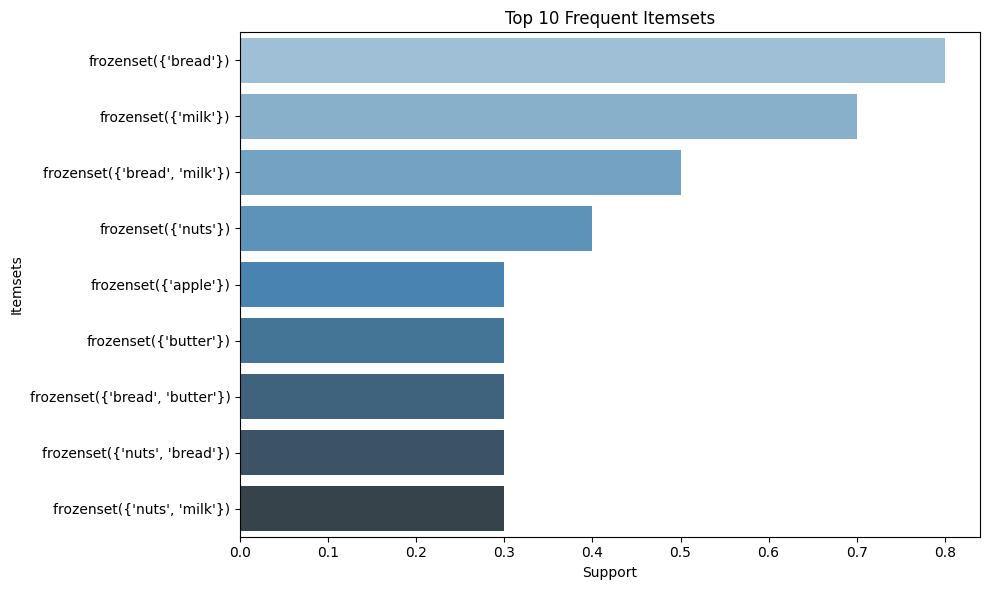


💡 Business Insights:
If a customer buys {'bread'}, they are likely to buy {'butter'} with 37.50% confidence (Lift: 1.25)
If a customer buys {'butter'}, they are likely to buy {'bread'} with 100.00% confidence (Lift: 1.25)
If a customer buys {'nuts'}, they are likely to buy {'milk'} with 75.00% confidence (Lift: 1.07)
If a customer buys {'milk'}, they are likely to buy {'nuts'} with 42.86% confidence (Lift: 1.07)


In [ ]:

# Market Basket Analysis using Apriori Algorithm
# By: suryavathi
# Internship Project for Business Analytics and data analytics

# Step 1: Import Libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Sample Dataset (you can replace this with your own transaction list)
dataset = [
    ['milk', 'bread', 'nuts'],
    ['milk', 'bread'],
    ['milk', 'bread', 'nuts', 'apple'],
    ['bread', 'apple'],
    ['milk', 'apple'],
    ['bread', 'butter'],
    ['milk', 'butter', 'bread'],
    ['bread', 'nuts'],
    ['milk', 'nuts'],
    ['milk', 'bread', 'butter']
]

# Step 3: Convert dataset to DataFrame
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Step 4: Apply Apriori Algorithm
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
print("✅ Frequent Itemsets:\n", frequent_itemsets)

# Step 5: Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
print("\n✅ Association Rules:\n", rules)

# Step 6: Visualize Top Frequent Itemsets
plt.figure(figsize=(10, 6))
top_items = frequent_itemsets.sort_values(by='support', ascending=False).head(10)
sns.barplot(x='support', y=top_items['itemsets'].astype(str), data=top_items, palette="Blues_d")
plt.title("Top 10 Frequent Itemsets")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.tight_layout()
plt.show()

# Step 7: Final Business Insight Print
print("\n💡 Business Insights:")
for _, row in rules.iterrows():
    print(f"If a customer buys {set(row['antecedents'])}, they are likely to buy {set(row['consequents'])} with {row['confidence']*100:.2f}% confidence (Lift: {row['lift']:.2f})")